In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "netflix_titles.csv"
data = pd.read_csv(file)
rename_data = data.rename(columns={"show_id": "Show ID", "type": "Type", "title": "Title", "director": "Director",
                            "cast": "Cast", "country": "Country", "date_added": "Date Added", "release_year": "Release Year",
                            "rating": "Rating", "duration": "Duration", "listed_in": "Genre", "description": "Description"})
#rename_data

In [3]:
clean_data = rename_data.replace(np.NaN) #, 'n') 
#clean_data.head(15)

In [4]:
# COUNTRY DATA
shows_country = clean_data[clean_data["Type"] == 'TV Show']
shows_country

,Show ID,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Genre,Description
2,70234439,TV Show,Transformers Prime,"Richard Finn, Tim Maltby","Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Richard Finn, Tim Maltby","Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,Fernando Lebrija,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,Hannah Fidell,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",United States,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6228,80159925,TV Show,Kikoriki,Onur Ünlü,Igor Dmitriev,Australia,"April 1, 2014",2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6229,80000063,TV Show,Red vs. Blue,Onur Ünlü,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,"April 1, 2014",2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Onur Ünlü,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,"April 1, 2014",2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Onur Ünlü,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,"April 1, 2014",2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [5]:
# NUMERO DE SHOWS POR GENERO

genre_list_show = [] 
genre_count_show = {}

for listed in shows_country['Genre']:
    split_gen = [x.strip() for x in listed.split(',')] # este me ayuda a split y remover espacios
    #print(split_genres)
    
    # Aqui puedo hacer el diccionario para que me vaya guardando cada valor y me cuente los elementos que hay en géneros  
    # traverse for all elements 
    for i in range(len(split_gen)): 
        # check if exists in unique_list or not 
        if split_gen[i] not in genre_list_show: 
            genre_list_show.append(split_gen[i]) 
            
        if split_gen[i] in genre_count_show:
            genre_count_show[split_gen[i]] = genre_count_show[split_gen[i]] + 1
        else:
            genre_count_show[split_gen[i]] = 1

#genre_count_show

In [6]:
# NUMERO DE SHOWS POR PAIS

country_list_show = [] 
country_count_show = {}

for listed_in in shows_country['Country']:
    split_country = [x.strip() for x in listed_in.split(',')] # este me ayuda a split y remover espacios
    #print(split_genres)
  
    # traverse for all elements 
    for j in range(len(split_country)): 
        # check if exists in unique_list or not 
        if split_country[j] not in country_list_show: 
            country_list_show.append(split_country[j]) 
            
        if split_country[j] in country_count_show:
            country_count_show[split_country[j]] = country_count_show[split_country[j]] + 1
        else:
            country_count_show[split_country[j]] = 1
            
#country_count_show

In [8]:
# RELACION DE NUMERO DE SHOWS QUE HAY POR GENERO EN CADA PAIS

matrizSh = np.zeros((len(country_list_show),len(genre_list_show)))
ctempo = shows_country['Country'].values
gtempo = shows_country['Genre'].values

for i in range(len(ctempo)):
    #print(i)
    cstmp=ctempo[i].split(',')
    #print(cstmp)
    for k in range(len(cstmp)):
        gctmp=gtempo[i].split(',')
        #print(gctmp)
        for j in range(len(gctmp)):
            try:
                matrizSh[country_list_show.index(cstmp[k].strip()),genre_list_show.index(gctmp[j].strip())]=matrizSh[country_list_show.index(cstmp[k].strip()),genre_list_show.index(gctmp[j].strip())]+1
            except:
                print('valor raro')

In [9]:
df_shows = pd.DataFrame(data=matrizSh, index=country_list_show, columns=genre_list_show)
df_shows

,Kids' TV,Crime TV Shows,International TV Shows,Spanish-Language TV Shows,Docuseries,Science & Nature TV,Romantic TV Shows,TV Comedies,TV Dramas,TV Thrillers,...,Reality TV,TV Action & Adventure,Teen TV Shows,Korean TV Shows,Anime Series,TV Horror,Stand-Up Comedy & Talk Shows,TV Sci-Fi & Fantasy,TV Shows,Classic & Cult TV
United States,183.0,129.0,134.0,30.0,149.0,34.0,54.0,224.0,234.0,23.0,...,76.0,73.0,20.0,13.0,14.0,33.0,30.0,52.0,4.0,16.0
Spain,5.0,21.0,47.0,31.0,6.0,1.0,11.0,8.0,13.0,0.0,...,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belgium,1.0,6.0,9.0,0.0,0.0,0.0,1.0,1.0,8.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
France,36.0,20.0,43.0,0.0,6.0,1.0,7.0,21.0,26.0,3.0,...,4.0,5.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Malta,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Croatia,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hungary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cyprus,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# TOP 10 DE PAISES QUE MAS TIENEN SHOWS

country_df_show = pd.DataFrame.from_dict(country_count_show, orient='index', columns=['Total Data'])
sorted_countries_show = country_df_show.sort_values(by=['Total Data'], ascending=False)
sorted_countries_show.head(10)

,Total Data
United States,810
United Kingdom,250
Japan,162
South Korea,129
Canada,126
India,89
France,83
Taiwan,68
Australia,60
Spain,57


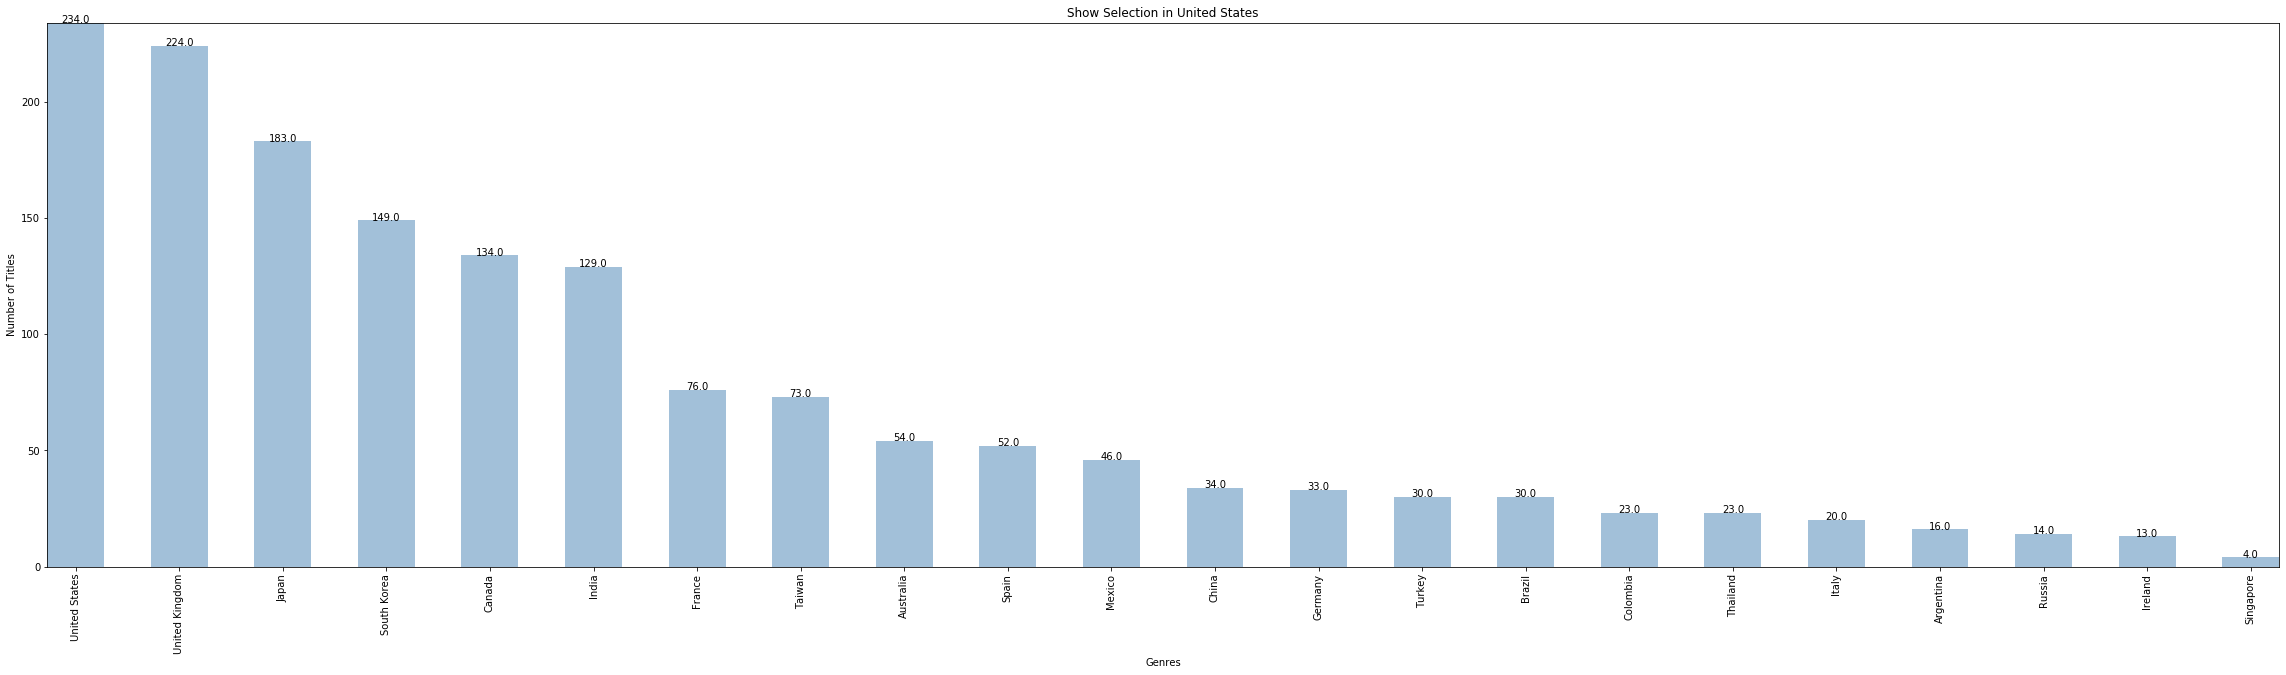

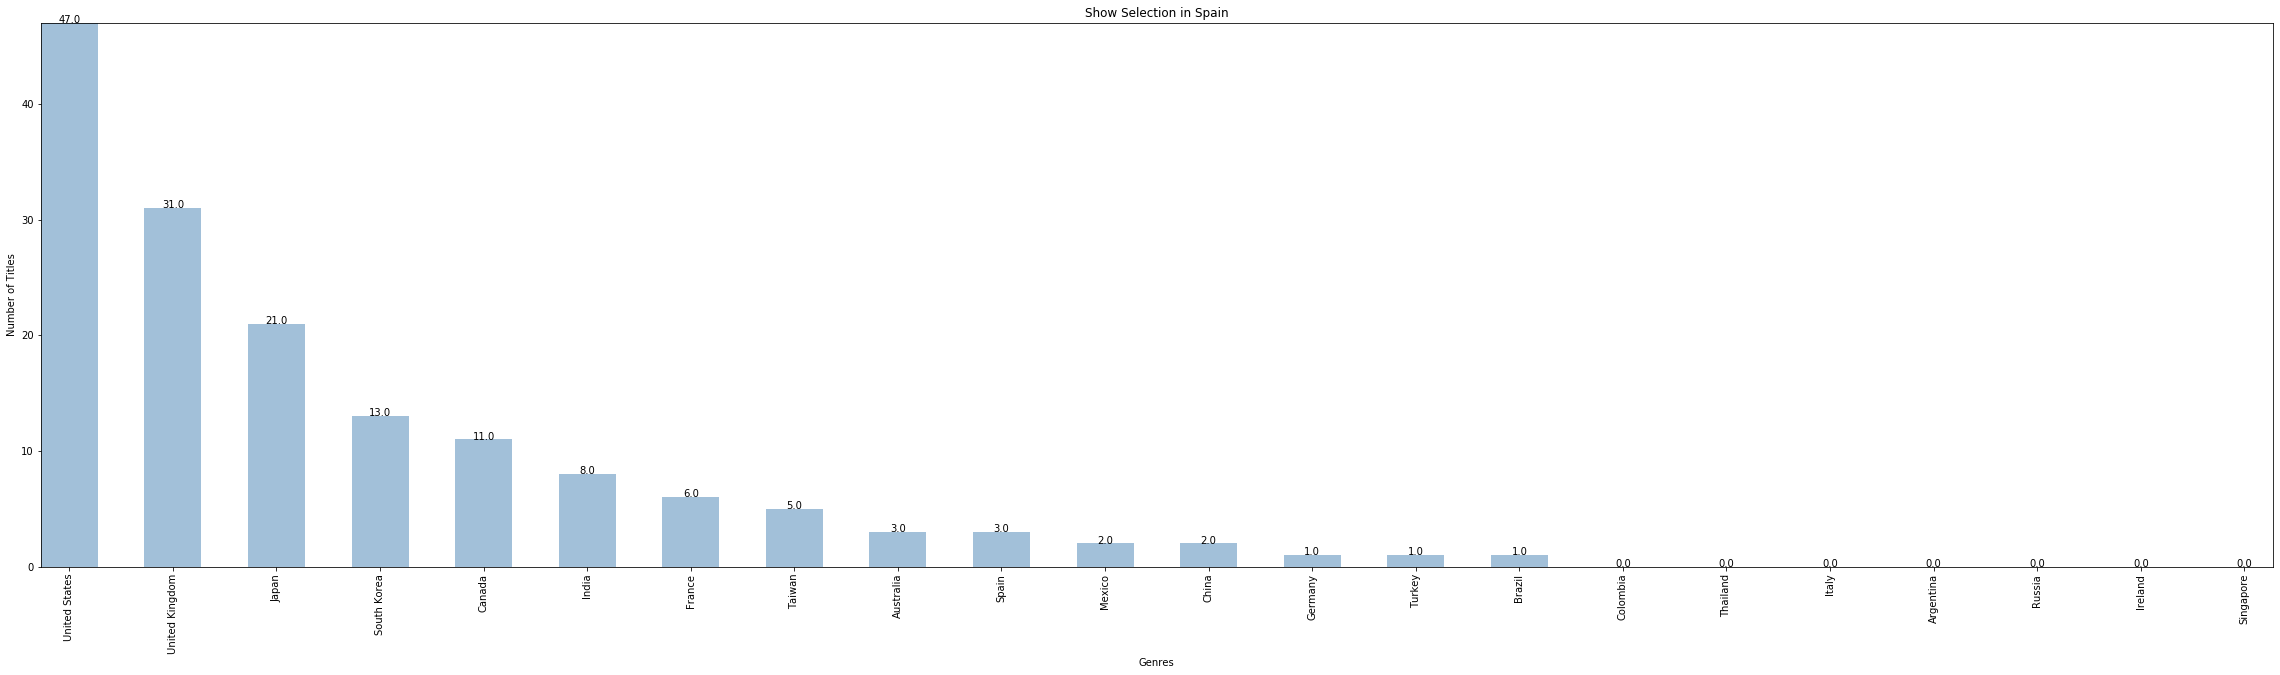

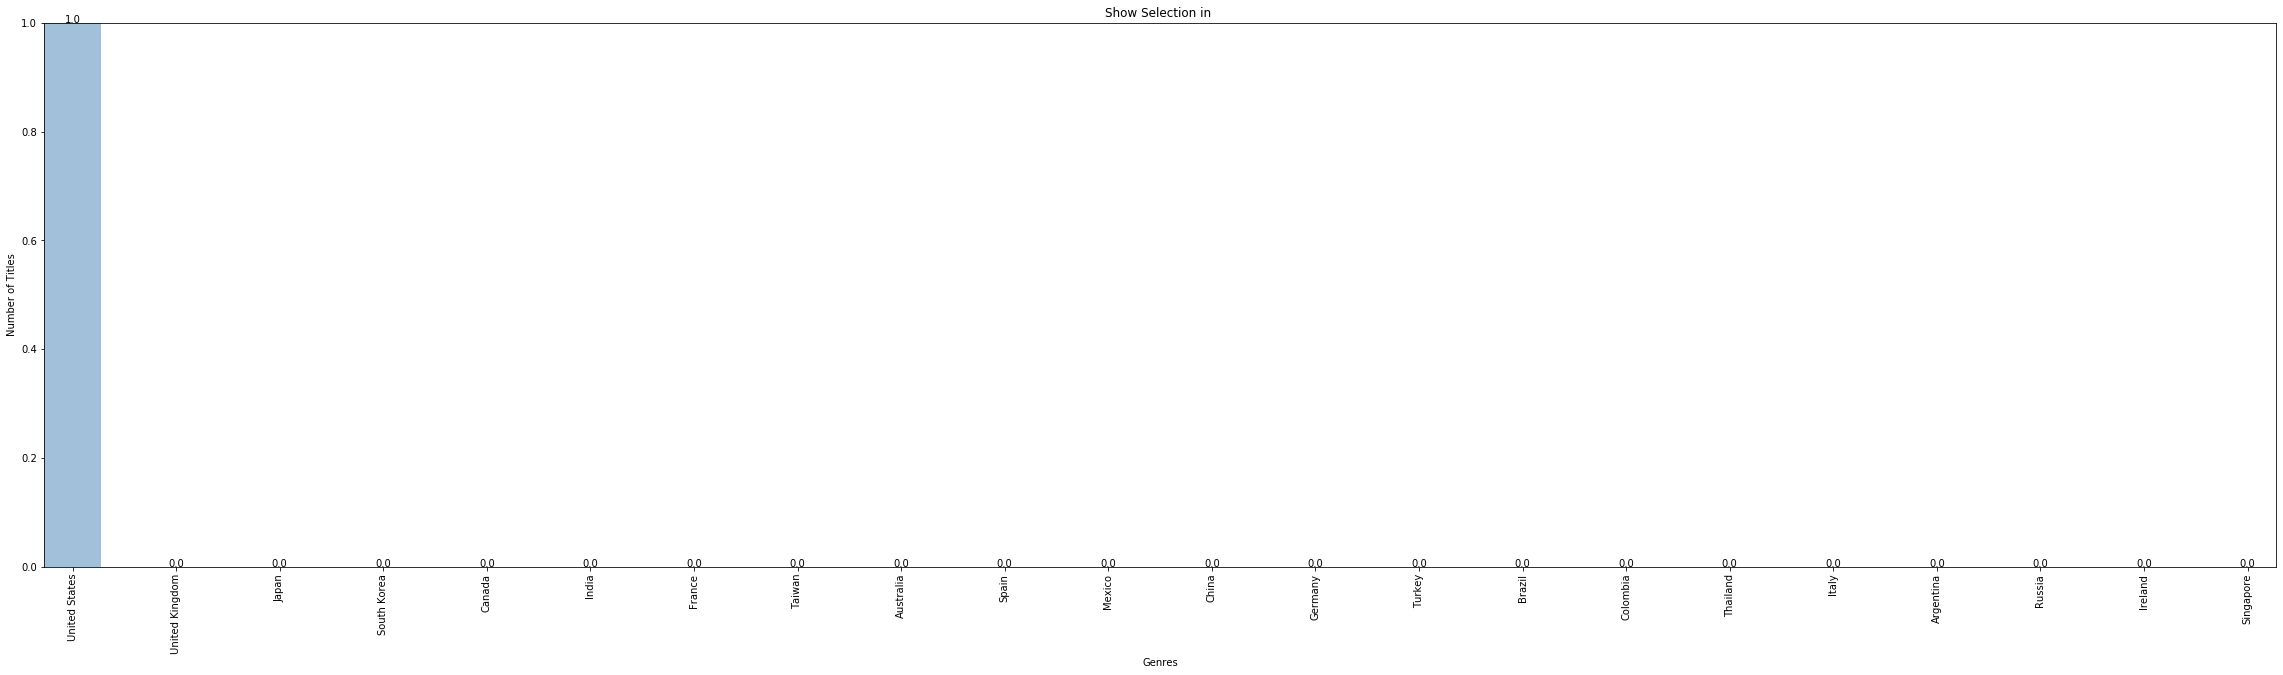

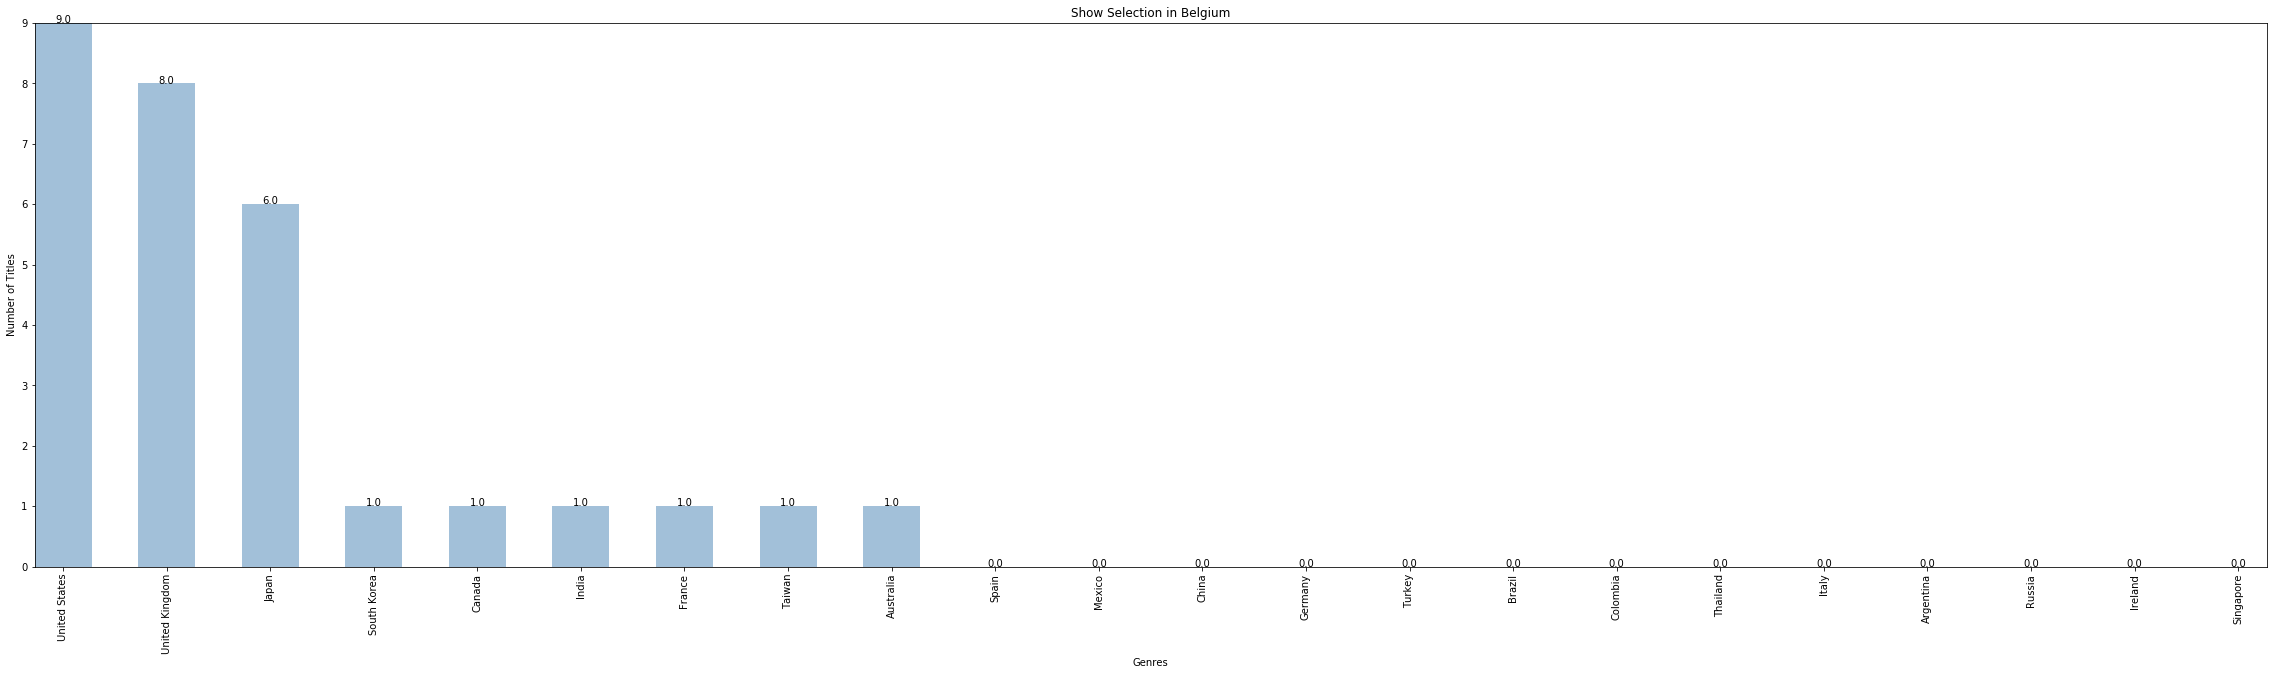

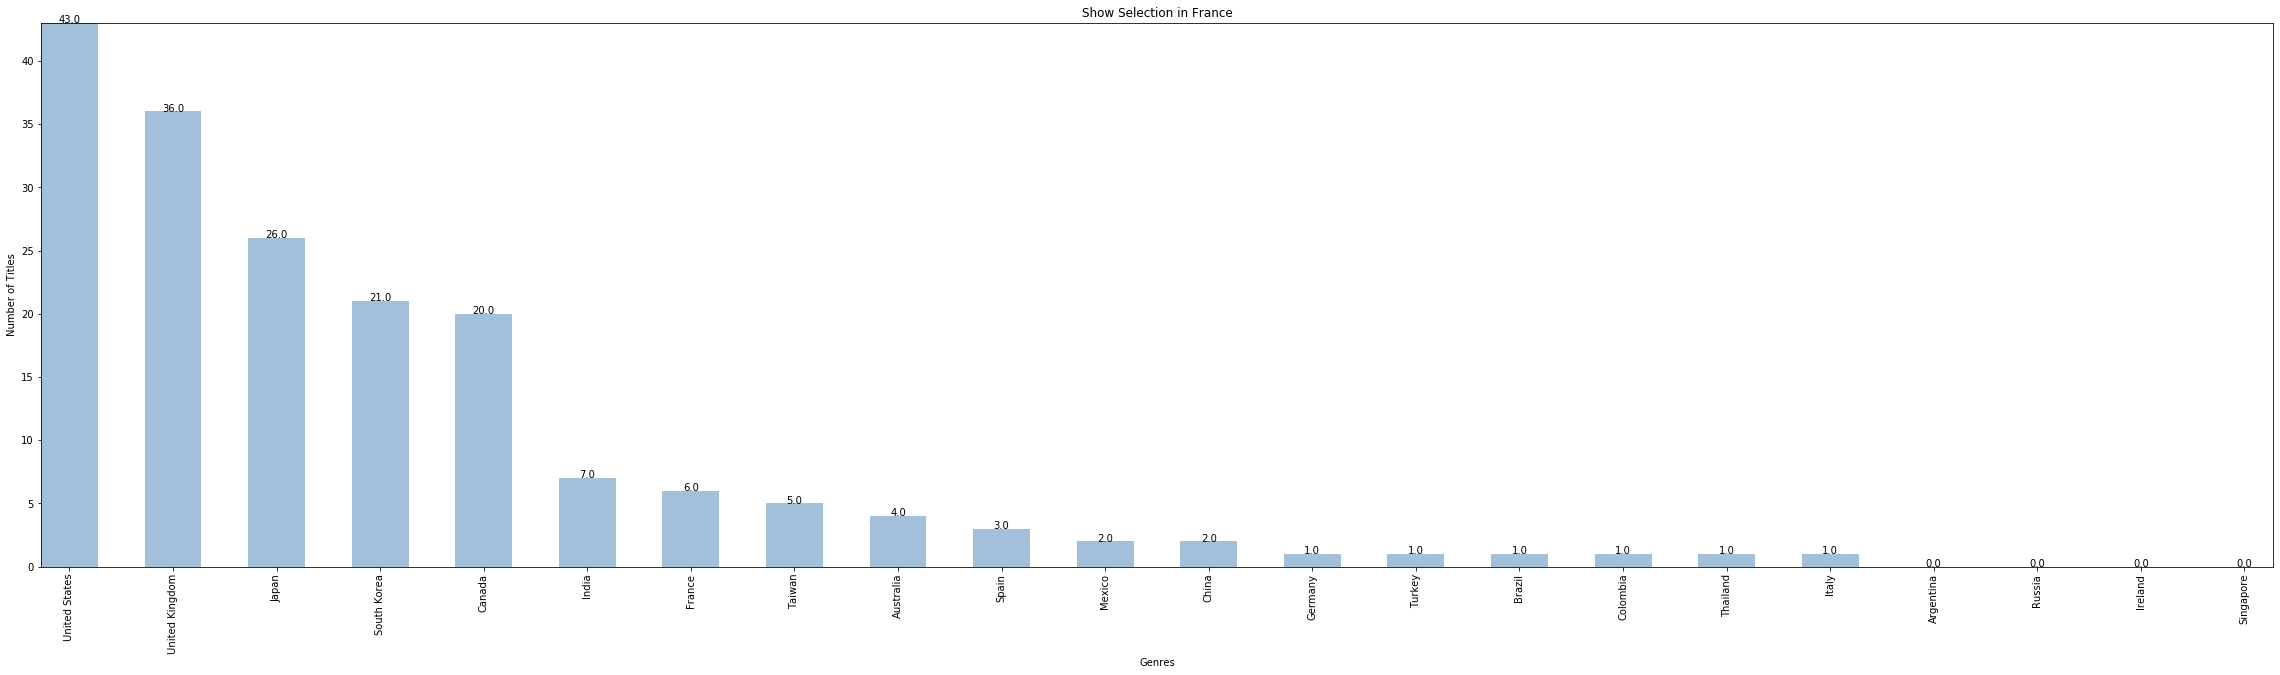

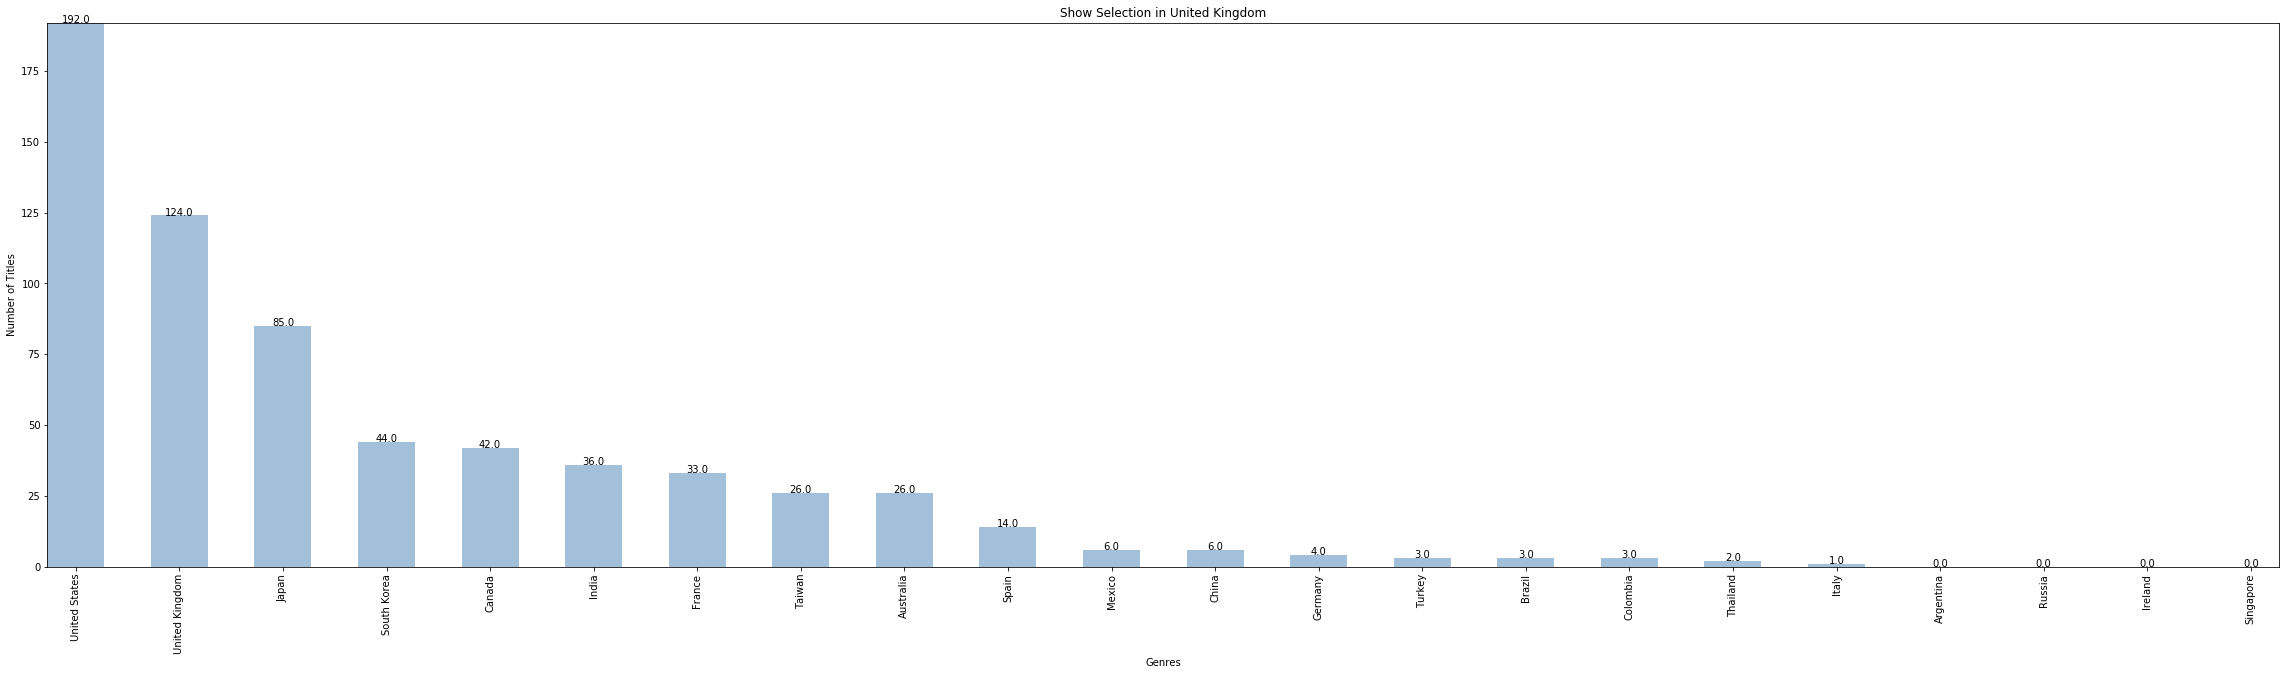

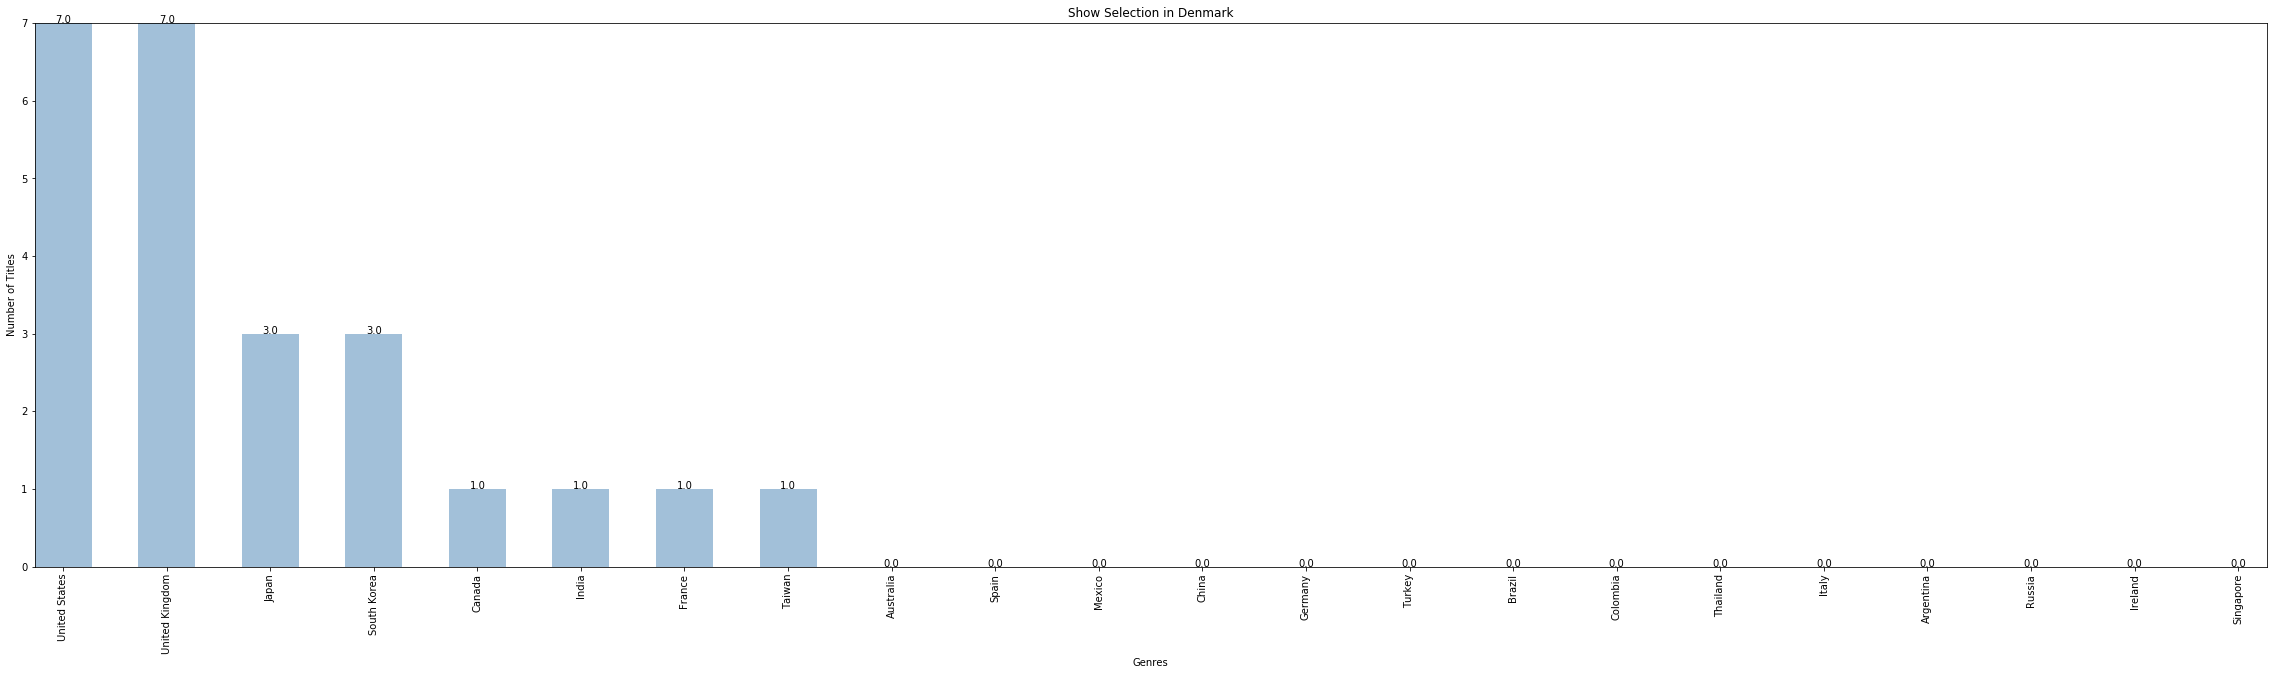

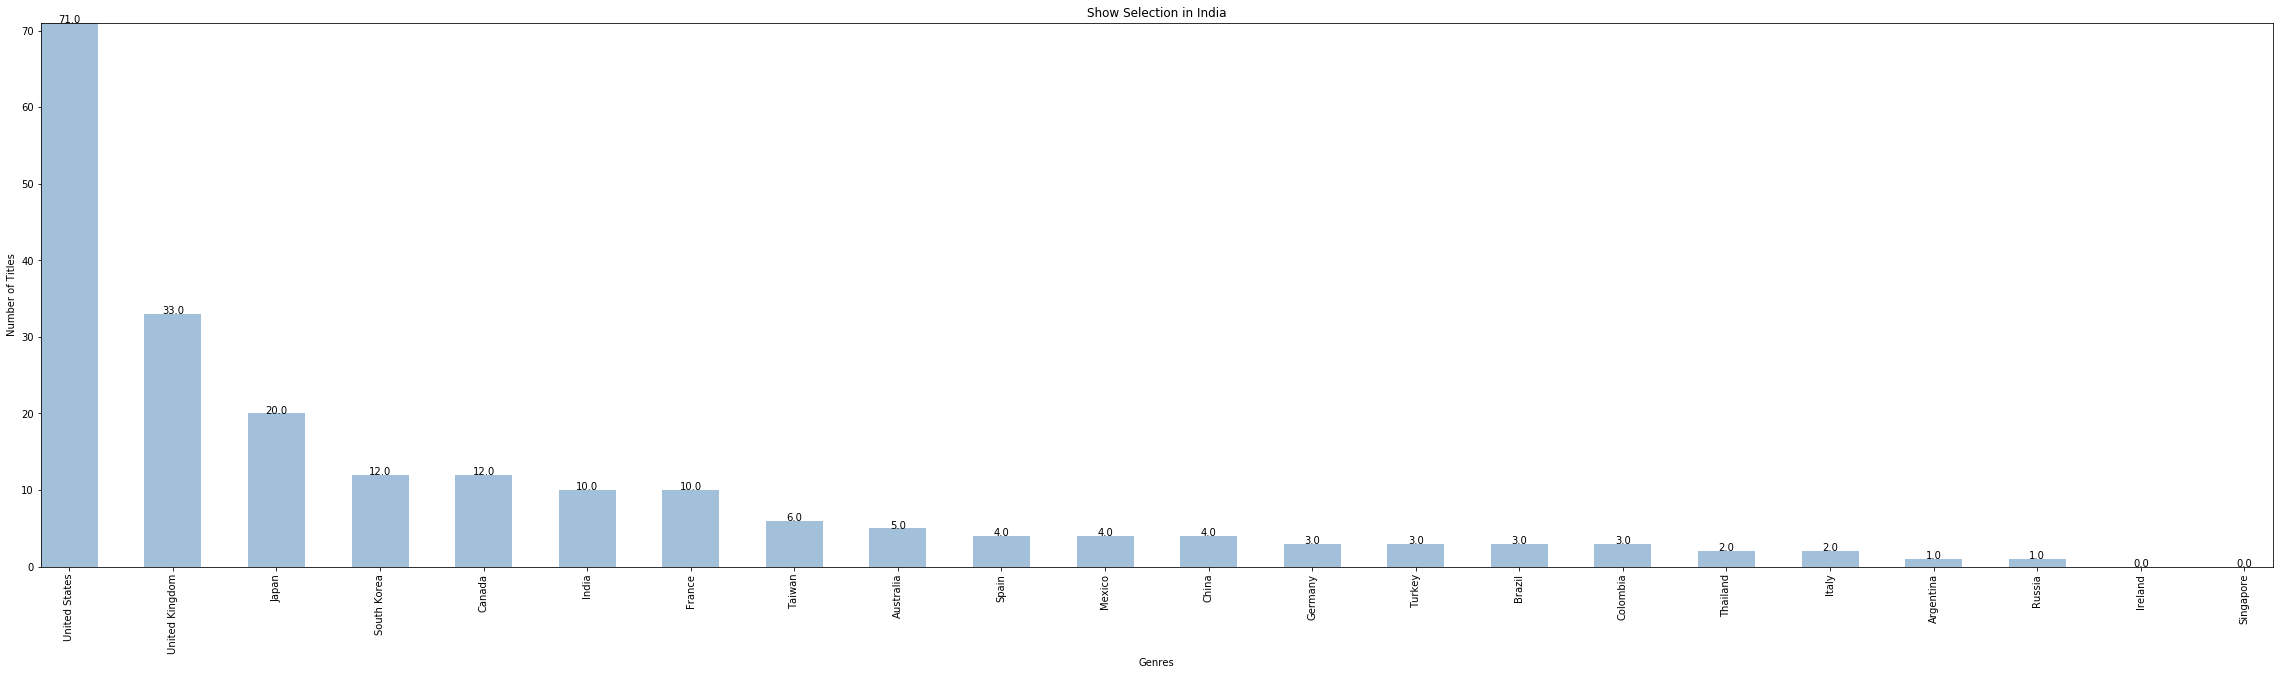

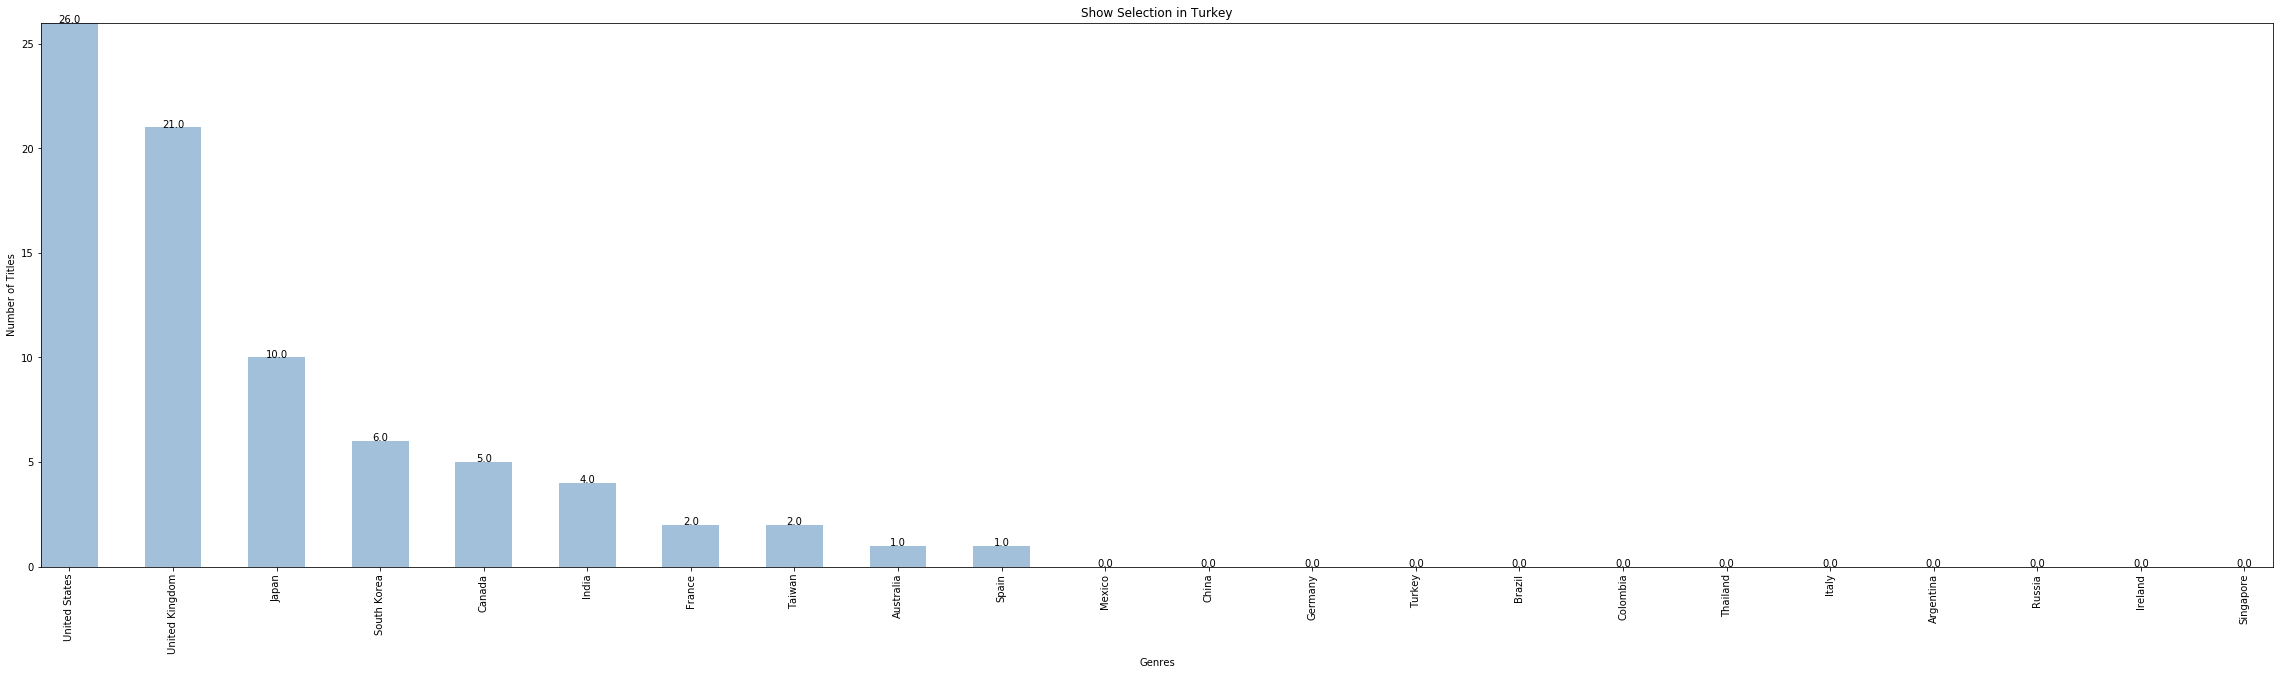

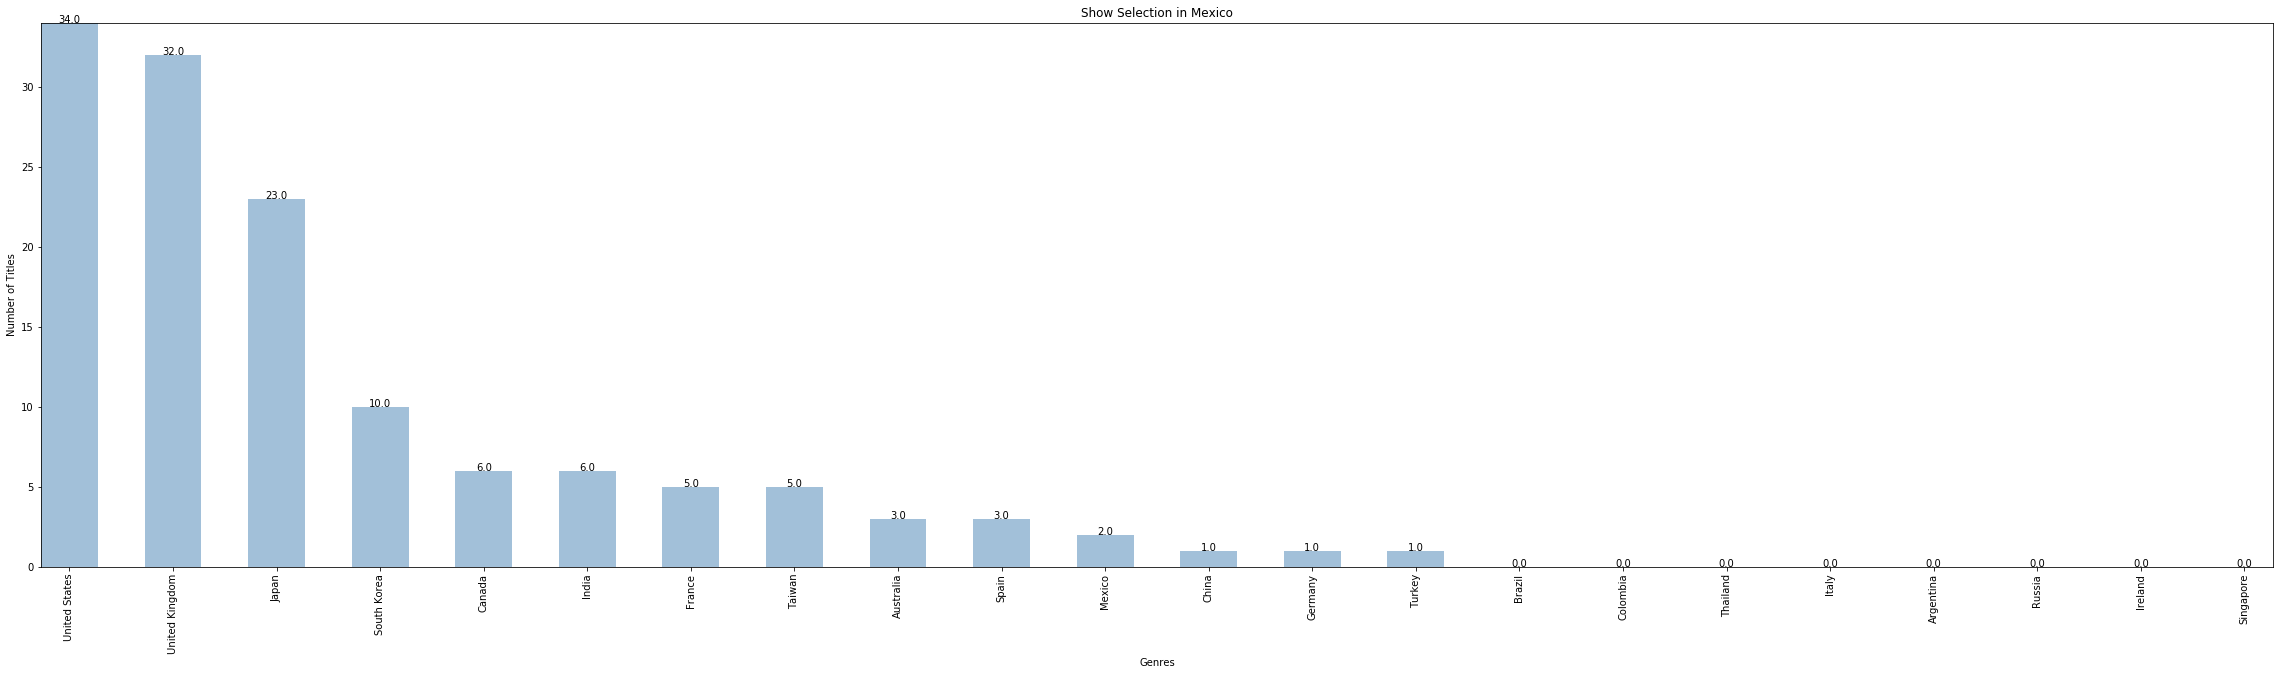

In [13]:
# GRAFICAS DEL CONTEO DE GENEROS POR PAIS
for a in range(10):
    # Data
    select_country =df_shows.index[a]
    country_genres = df_shows.iloc[a,:]
    sorted_genres = pd.DataFrame(country_genres).sort_values(by=select_country, ascending=False)
    
    # Plot
    x_values = np.arange(len(sorted_genres[select_country]))
    tick_glocations = [value for value in x_values]
    width = 0.55
    # Create a list indicating where to write x labels and set figure size to adjust for space
    plt.figure(figsize=(40,10))
    plt.bar(x_values, sorted_genres[select_country], width=width, color='steelblue', alpha=0.5) 
    plt.xticks(tick_glocations, sorted_countries_show.index, rotation="vertical")
    plt.autoscale(tight=True)
    plt.xlabel('Genres')
    plt.ylabel('Number of Titles')
    plt.title('Show Selection in ' + select_country)

    for i, v in enumerate(sorted_genres[select_country]):
        plt.text(i, v, str(v), color='k', ha='center')
        
    plt.savefig('Movies_fig/Show_country_' + str(a) + '.png')
